# MC886 Assigment 1

## Objective:
Use linear regression model to predict the prices of diamonds given their atributes. The data set might be found on:
https://www.kaggle.com/shivam2503/diamonds.


## Activities
1.  Perform Linear Regression.  You should implement your solution and compare it with sklearn.linear model.SGDRegressor(“linear  model  fitted  by  minimizing  a  regularized  empirical  loss  with  SGD”).What are the conclusions?  
2.  Use the specified training/test data for providing your results and avoid overfitting.Keep in mind that friends don’t let friends use testing data for training.  
3.  Plot  the  cost  function  vs.  number  of  iterations  in  the  training  set  and  analyze  the  model  complexity. What are the conclusions?  What are the actions after such analyses?
4.  Use different Gradient Descent (GD) learning rates when optimizing.  Compare the GD-based solutionswith Normal Equation.  You should implement your solutions.  What are the conclusions?  
5.  Prepare  a  4-page  (max.)  report  with  all  your  findings.  It  is  UP  TO  YOU  to  convince  the  reader  that you are proficient on linear regression and the choices it entails.


In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from utils import *

In [3]:
data_dir = '../data/diamonds.csv'

In [4]:
with open(data_dir, 'rb') as csvfile:
    dataset = pd.read_csv(data_dir)
    
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#carat	cut	color	clarity	depth	table	price	x	y	z
print(dataset)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6               7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7               8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8               9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9              10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   
10             11   0.30       Good     J     SI1   64.0   55.0    339  4.25   
11             12   0.23      Ideal     

## Preprocessing the data

### 1. Split data in training, validation and test
A wise person said: "friends don’t let friends use testing data for training". t.

**Note:**
* **sklearn.model_selection.train_test_split(*arrays, **options)**  
    Split arrays or matrices into random train and test subsets.  
    See documentation:http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 2. Put the dataset into Numpy volume
Categorical atributes are changed to integers.  
The cell bellow runs a code to shuffle and split the dataset into 3 sets, training, validation and test.

### 3. Transform categorical data into numbers
Used fit_transform function.
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
http://pbpython.com/categorical-encoding.html

In [73]:
#RUN THIS ONLY ONCE!
#this code saves the numpy vectors to files, if the files already exists, don't run
#split_data(dataset)

In [6]:
#load the numpy files (training set, validation set, test set)
x_train, y_train, x_validation, y_validation, x_test, y_test = load_vectors()
y_train = y_train.reshape((1,y_train.shape[0]))
y_validation = y_validation.reshape((1,y_validation.shape[0]))
y_test = y_test.reshape((1,y_test.shape[0]))

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_validation.shape = ", x_validation.shape)
print("y_validation.shape = ", y_validation.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)
print("prices = ", y_train)
print("an input example = ", x_train[:, 0])

x_train.shape =  (9, 30000)
y_train.shape =  (1, 30000)
x_validation.shape =  (9, 10000)
y_validation.shape =  (1, 10000)
x_test.shape =  (9, 13940)
y_test.shape =  (1, 13940)
prices =  [[1760.  506. 2898. ... 1577. 1087.  658.]]
an input example =  [ 0.54  2.    3.    4.   62.2  56.    5.23  5.19  3.24]


In [7]:
def init_parameters(X):
    """
    Receives: the input vector shape (nx, m), where nx is the number of features and
    m the number of examples.
    Returns:
    W: the weight array shape ( 1, nx)
    dW: the derivative array shape ( 1, nx)
    b: a vector shape (nx,1)
    db: the derivative of the bias.
    """
    nx = X.shape[0]
    W = np.random.randn(nx,1)*0.01
    dw = np.random.randn(nx,1)*0.01
    b = np.zeros((nx,1))
    db = np.zeros((nx,1))
    return W,b, dw, db

In [8]:
def l2_cost(X, Y, Y_hat, m):
    """
    Cost function defined by a variation of the l2 norm function.
    The '2' in the denominator makes its deriative easier
    """
    cost = (1.0/(2*m))*np.sum((Y-Y_hat)**2)
    return cost

In [9]:
#FORWARD PROPAGATION (WELL THIS IS NOT A NN, BUT ...)
def forward_prop(X, w, b):
    """
    X is the input vector with m training examples, shape (1,m)
    w: is the angular coefficient shape (9,1)
    b: is the linear coefficient  shape (9,1)
    """
    Y_hat = np.dot(w.T, X) + b
    return Y_hat

In [10]:
def backward_propagation(X,Y, Y_hat, m):
    """
    Calculates the derivatives of the parameters
    returns:
    dw
    db
    """
    nx = X.shape[0]
    ny = Y.shape[0]
    dw = (-1./m)*np.dot(X,(Y -Y_hat).T)
    db = (-1./m)*np.sum((Y -Y_hat))
#     assert(dw.shape == (nx, ny))
    return dw, db

## Batch Gradient Descent Model
Given the cost function $J(w,b)$, where w is a vector of weights that multiply each of the input features and b is a real constant number we want to minimize it.
$$ J(w,b) = \frac{1}{2m}\sum_{i}^{m}(y^{(i)} - ŷ^{(i)})^{2} $$
$$ ŷ = wx + b$$
To use this algorithm we need to compute the derivatives of the cost (backward propagation) in order to update the parameters w and b.
$$\frac{\partial J(w,b)}{\partial w} = -\frac{1}{m}\sum_{i = i}^{m} (y - ŷ)x$$
$$\frac{\partial J(w,b)}{\partial w} = -\frac{1}{m}\sum_{i = i}^{m} (y - ŷ)$$

In [11]:
def GD_model(X,Y, num_iterations = 1000, learning_rate = 0.000000001):
    """
    Arguments:
    X: input array shape (nx, m), nx is the number of input features and m the number of
    training examples.
    Y: label array shape (ny, m) where ny is the number of the output feature.
    Given X and Y estimates the best linear function to fit the data
    """
    m = X.shape[1]
    print('m = ', m) 
    
    w,b,dw,db = init_parameters(x_train)
    for iteration in range(num_iterations):
        
        #forward propagation (we can think the activation function as linear)
        Y_hat = forward_prop(X,w,b)
        
        #plot the cost function
        cost = l2_cost(X,Y, Y_hat,m)
        plt.plot(iteration,cost,'ro')
    
        #Backward propagation calculate the derivatives 
        dw, db = backward_propagation(X,Y,Y_hat, m)
    
        #Update parameters simultaneusly
        temp_w = w - learning_rate*dw
        temp_b = b - learning_rate*db
        w = temp_w
        b = temp_b
    plt.show()
    return w, b, cost

m =  30000


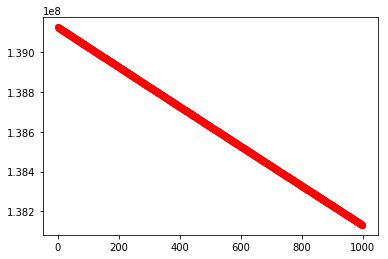

cost in the training set:  138131714.76609826
weights:  [[0.00784168 0.00784168 0.00784168 0.00784168 0.00784168 0.00784168
  0.00784168 0.00784168 0.00784168]
 [0.00118145 0.00118145 0.00118145 0.00118145 0.00118145 0.00118145
  0.00118145 0.00118145 0.00118145]
 [0.00708618 0.00708618 0.00708618 0.00708618 0.00708618 0.00708618
  0.00708618 0.00708618 0.00708618]
 [0.03595109 0.03595109 0.03595109 0.03595109 0.03595109 0.03595109
  0.03595109 0.03595109 0.03595109]
 [0.24211009 0.24211009 0.24211009 0.24211009 0.24211009 0.24211009
  0.24211009 0.24211009 0.24211009]
 [0.2282476  0.2282476  0.2282476  0.2282476  0.2282476  0.2282476
  0.2282476  0.2282476  0.2282476 ]
 [0.01926921 0.01926921 0.01926921 0.01926921 0.01926921 0.01926921
  0.01926921 0.01926921 0.01926921]
 [0.01593538 0.01593538 0.01593538 0.01593538 0.01593538 0.01593538
  0.01593538 0.01593538 0.01593538]
 [0.03089206 0.03089206 0.03089206 0.03089206 0.03089206 0.03089206
  0.03089206 0.03089206 0.03089206]]
bias:  [

In [12]:
# TRIANIG THE GD
w_gd, b_gd, cost_gd= GD_model(x_train,y_train)
print("cost in the training set: ", cost_gd)
print("weights: ", w_gd)
print("bias: ", b_gd)

## Stochastic Gradient Descent Model

In [55]:
def SGD_model(X,Y, num_iterations = 30, learning_rate = 0.00000001):
    """
    X: an input array shape (nx, m), nx is the input feature size and m is the number of training examples
    Given X and Y estimates the best linear function to fit the data
    """
   
    m = X.shape[1]    # number of training examples
    nx = X.shape[0]   # number of features in the input
    ny = Y.shape[0]   # number of features in the label
    
    # initialize parameters
    w = np.random.randn(nx,1)*0.001
    dw = np.random.randn(nx,1)*0.001
    b = np.random.randn(1)*0.001
    db = np.random.randn(1)*0.001
    
    # for each epoch
    for iteration in range(num_iterations):
        print("\riteração: ", iteration +1, end = "")
        #for each element in the example's vector (shape (9,1))
        Y_hat = np.empty((ny, m))
        for i in range(m):
            #extract a columns of the input, remember the ith column has the ith example
            x_i = X[:, i].reshape(nx,1) #reshape to avoid rank 1 array
            y_i = Y[:, i].reshape(ny,1)

            #calulate the prediction y_hat
            y_hat_i = np.dot(w.T,x_i) + b
            Y_hat[:,i] = y_hat_i
            
            #calculate the derivatives
            dw, db = backward_propagation(x_i,y_i,y_hat_i, 1)

            temp_w = w - learning_rate*dw
            temp_b = b - learning_rate*db
            w = temp_w
            b = temp_b
        #calculate and plot the cost
        cost = l2_cost(X,Y, Y_hat,m)
        plt.ylabel('Custo')
        plt.xlabel('Iteracoes')
        plt.plot(iteration,cost,'ro')
    plt.show()
    return w, b, cost

iteração:  30

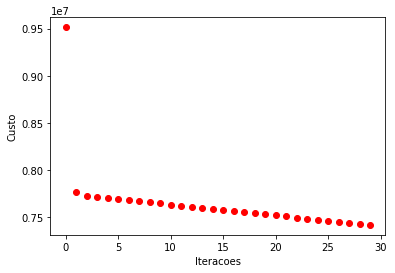

cost in the training set:  7419941.577529653


In [57]:
# TRAINING THE SDG MODEL
# dividindo pelo máximo


w_sgd, b_sgd, cost_sgd = SGD_model(x_train,y_train)
print("cost in the training set: ", cost_sgd)
# print("weights: ", w_sgd)
# print("bias: ", b_sgd)

## Scikit Learn SGD Regressor

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

train_size = x_train.shape[1]

clf = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', learning_rate = 'constant', eta0 = 0.00000001)
clf.fit(x_train.T, np.ravel(y_train.T))

# Make predictions using the testing set
y_hat = clf.predict(x_train.T)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_train.T, y_hat.T))

print("Error: %.2f"
      % l2_cost(x_train, y_train, y_hat, train_size))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train.T, y_hat.T))

# cost [element] = l2_cost(x_train, y_train, y_)
# plt.show()
# print(cost)

Coefficients: 
 [ 2.96288889  1.5910801   2.99402564  1.28608281 31.94857678 31.41499137
  8.78477765  8.77530941  5.39799523]
Mean squared error: 15399251.23
Error: 7699625.61
Variance score: 0.02


/home/pcmasterrace/miniconda2/envs/gpu/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Normal equation

In [16]:
x0_norm = np.ones((train_size, 1))
X_norm = np.concatenate((x0_norm, x_train.T), axis=1)
# # compute Normal Eq.
XTX_inv = np.linalg.inv(np.matmul(X_norm.T, X_norm))
theta_norm = np.matmul(np.matmul(XTX_inv, X_norm.T), y_train.T)
print('Normal equation compute successfully =D') # check if the system has hanged

Normal equation compute successfully =D


In [17]:
# Test
X_validation_norm = np.concatenate((np.ones((x_validation.shape[1], 1)), x_validation.T), axis=1)
y_validation_norm = y_validation

for i in range(X_validation_norm.shape[0]):
    estimate = np.matmul(theta_norm.T, np.reshape(X_validation_norm[i], (X_norm.shape[1], 1)))
    print('i: %d; estimado: %.3lf; real: %.3lf; diferenca: %.3lf' 
          %(i, estimate, y_validation_norm[:,i], estimate-y_validation_norm[:,i]))

i: 0; estimado: 13846.500; real: 9728.000; diferenca: 4118.500
i: 1; estimado: 2782.918; real: 1984.000; diferenca: 798.918
i: 2; estimado: 3303.922; real: 2606.000; diferenca: 697.922
i: 3; estimado: 2741.294; real: 1801.000; diferenca: 940.294
i: 4; estimado: 2017.954; real: 1824.000; diferenca: 193.954
i: 5; estimado: 649.262; real: 583.000; diferenca: 66.262
i: 6; estimado: 527.944; real: 589.000; diferenca: -61.056
i: 7; estimado: 307.030; real: 602.000; diferenca: -294.970
i: 8; estimado: 3884.476; real: 4234.000; diferenca: -349.524
i: 9; estimado: 6108.139; real: 3607.000; diferenca: 2501.139
i: 10; estimado: 6184.159; real: 7078.000; diferenca: -893.841
i: 11; estimado: 13640.106; real: 11951.000; diferenca: 1689.106
i: 12; estimado: 10920.298; real: 11220.000; diferenca: -299.702
i: 13; estimado: 4616.153; real: 4309.000; diferenca: 307.153
i: 14; estimado: 7927.262; real: 8669.000; diferenca: -741.738
i: 15; estimado: 4964.611; real: 3819.000; diferenca: 1145.611
i: 16; esti

i: 2303; estimado: 4747.405; real: 4265.000; diferenca: 482.405
i: 2304; estimado: 1838.352; real: 1749.000; diferenca: 89.352
i: 2305; estimado: 2153.917; real: 2111.000; diferenca: 42.917
i: 2306; estimado: 2691.142; real: 2306.000; diferenca: 385.142
i: 2307; estimado: 749.828; real: 844.000; diferenca: -94.172
i: 2308; estimado: 2053.510; real: 893.000; diferenca: 1160.510
i: 2309; estimado: 267.896; real: 719.000; diferenca: -451.104
i: 2310; estimado: -365.928; real: 641.000; diferenca: -1006.928
i: 2311; estimado: 1352.676; real: 633.000; diferenca: 719.676
i: 2312; estimado: 1066.686; real: 1350.000; diferenca: -283.314
i: 2313; estimado: 2791.320; real: 2518.000; diferenca: 273.320
i: 2314; estimado: 497.054; real: 899.000; diferenca: -401.946
i: 2315; estimado: 3443.823; real: 3517.000; diferenca: -73.177
i: 2316; estimado: 703.010; real: 1353.000; diferenca: -649.990
i: 2317; estimado: 357.722; real: 596.000; diferenca: -238.278
i: 2318; estimado: 10096.310; real: 8637.000; 

i: 3696; estimado: 1573.388; real: 1013.000; diferenca: 560.388
i: 3697; estimado: 690.543; real: 764.000; diferenca: -73.457
i: 3698; estimado: 5846.885; real: 6285.000; diferenca: -438.115
i: 3699; estimado: 3214.242; real: 2901.000; diferenca: 313.242
i: 3700; estimado: 2183.261; real: 1629.000; diferenca: 554.261
i: 3701; estimado: -342.343; real: 492.000; diferenca: -834.343
i: 3702; estimado: 2849.258; real: 2721.000; diferenca: 128.258
i: 3703; estimado: 12090.985; real: 15460.000; diferenca: -3369.015
i: 3704; estimado: 1456.406; real: 685.000; diferenca: 771.406
i: 3705; estimado: 6528.535; real: 6691.000; diferenca: -162.465
i: 3706; estimado: -197.552; real: 697.000; diferenca: -894.552
i: 3707; estimado: 6068.960; real: 7806.000; diferenca: -1737.040
i: 3708; estimado: -1055.152; real: 537.000; diferenca: -1592.152
i: 3709; estimado: 1616.835; real: 1167.000; diferenca: 449.835
i: 3710; estimado: 1887.809; real: 1378.000; diferenca: 509.809
i: 3711; estimado: 2053.047; real

i: 6062; estimado: 2914.502; real: 2743.000; diferenca: 171.502
i: 6063; estimado: 9814.617; real: 9185.000; diferenca: 629.617
i: 6064; estimado: 865.156; real: 583.000; diferenca: 282.156
i: 6065; estimado: 727.867; real: 872.000; diferenca: -144.133
i: 6066; estimado: -967.897; real: 1114.000; diferenca: -2081.897
i: 6067; estimado: 1087.222; real: 758.000; diferenca: 329.222
i: 6068; estimado: 1358.420; real: 1853.000; diferenca: -494.580
i: 6069; estimado: 14055.108; real: 14888.000; diferenca: -832.892
i: 6070; estimado: 2055.032; real: 1123.000; diferenca: 932.032
i: 6071; estimado: 782.412; real: 489.000; diferenca: 293.412
i: 6072; estimado: 132.769; real: 449.000; diferenca: -316.231
i: 6073; estimado: 8.532; real: 687.000; diferenca: -678.468
i: 6074; estimado: 1704.737; real: 1683.000; diferenca: 21.737
i: 6075; estimado: 5421.038; real: 5747.000; diferenca: -325.962
i: 6076; estimado: 995.857; real: 686.000; diferenca: 309.857
i: 6077; estimado: 14054.007; real: 15563.000;

i: 8284; estimado: 2543.471; real: 1674.000; diferenca: 869.471
i: 8285; estimado: 2292.289; real: 1605.000; diferenca: 687.289
i: 8286; estimado: 4626.335; real: 3618.000; diferenca: 1008.335
i: 8287; estimado: 205.295; real: 828.000; diferenca: -622.705
i: 8288; estimado: -244.506; real: 1255.000; diferenca: -1499.506
i: 8289; estimado: 1763.766; real: 1973.000; diferenca: -209.234
i: 8290; estimado: 248.063; real: 719.000; diferenca: -470.937
i: 8291; estimado: 4883.442; real: 2717.000; diferenca: 2166.442
i: 8292; estimado: 5263.898; real: 3733.000; diferenca: 1530.898
i: 8293; estimado: 2371.042; real: 2293.000; diferenca: 78.042
i: 8294; estimado: 164.379; real: 552.000; diferenca: -387.621
i: 8295; estimado: 13402.558; real: 15291.000; diferenca: -1888.442
i: 8296; estimado: 2859.045; real: 2873.000; diferenca: -13.955
i: 8297; estimado: 8321.169; real: 6942.000; diferenca: 1379.169
i: 8298; estimado: 217.906; real: 743.000; diferenca: -525.094
i: 8299; estimado: 2865.593; real:

MINIBATCH
---

In [47]:
def hypotesis(theta, X):
    return np.matmul(theta.T, X)

In [48]:
batch_size = 64
n_epoch = 100
batches_per_epoch = int(np.ceil(train_size / float(batch_size)))
# n_steps = int(round(batches_per_epoch * n_epoch))
n_steps = 1000
learning_rate = 0.000000001
cost_mbgd = np.zeros((n_steps))

print('training size: ', X_mbgd.shape)
print('number of epoch: ', n_epoch)
print('batches per epoch: ', batches_per_epoch)
print('number of steps: ', n_steps)

training size:  (30000, 10)
number of epoch:  100
batches per epoch:  469
number of steps:  1000


In [49]:
from sklearn.utils import shuffle

theta_mbgd = np.random.rand(x_train.shape[0] + 1, 1) * 0.01
x0_mbgd = np.ones((train_size, 1))
X_mbgd = np.concatenate((x0_mbgd, x_train.T), axis=1)
y_train_mbgd = np.copy(y_train)
print('theta shape', theta_mbgd.shape)
print('x shape', X_mbgd.shape, y_train_mbgd.shape)

for j in range(n_steps):
#     X_mbgd, tmp = shuffle(X_mbgd, y_train_mbgd.T, random_state=0) #TODO
#     y_train_mbgd = tmp.T
    for i in range(0, train_size, batch_size):
        h = hypotesis(theta_mbgd, X_mbgd[i:i+batch_size, :].T)
        cost_mbgd[j] = l2_cost(theta_mbgd, h, y_train_mbgd[:, i:i+batch_size], batch_size)
#         dw = (-1./m)*np.dot(X,(Y -Y_hat).T)
        theta_mbgd = theta_mbgd - (learning_rate  * np.sum(np.dot((h - y_train_mbgd[:, i:i+batch_size]), X_mbgd[i:i+batch_size, :]))) / batch_size
#         theta_mbgd = theta_mbgd - (learning_rate  * np.sum((h - np.sum(y_train_mbgd[:, i:i+batch_size]))) / batch_size)
    print('j: %d;\tcost: %.3lf' %(j, cost_mbgd[j]))

theta shape (10, 1)
x shape (30000, 10) (1, 30000)
j: 0;	cost: 12434927.509
j: 1;	cost: 12312989.552
j: 2;	cost: 12193383.393
j: 3;	cost: 12076063.969
j: 4;	cost: 11960987.092
j: 5;	cost: 11848109.434
j: 6;	cost: 11737388.507
j: 7;	cost: 11628782.650
j: 8;	cost: 11522251.010
j: 9;	cost: 11417753.530
j: 10;	cost: 11315250.927
j: 11;	cost: 11214704.684
j: 12;	cost: 11116077.032
j: 13;	cost: 11019330.934
j: 14;	cost: 10924430.074
j: 15;	cost: 10831338.840
j: 16;	cost: 10740022.312
j: 17;	cost: 10650446.247
j: 18;	cost: 10562577.068
j: 19;	cost: 10476381.850
j: 20;	cost: 10391828.306
j: 21;	cost: 10308884.776
j: 22;	cost: 10227520.216
j: 23;	cost: 10147704.183
j: 24;	cost: 10069406.824
j: 25;	cost: 9992598.868
j: 26;	cost: 9917251.610
j: 27;	cost: 9843336.903
j: 28;	cost: 9770827.144
j: 29;	cost: 9699695.269
j: 30;	cost: 9629914.736
j: 31;	cost: 9561459.519
j: 32;	cost: 9494304.097
j: 33;	cost: 9428423.444
j: 34;	cost: 9363793.018
j: 35;	cost: 9300388.756
j: 36;	cost: 9238187.059
j: 37;	co

j: 318;	cost: 5963892.601
j: 319;	cost: 5963446.203
j: 320;	cost: 5963006.323
j: 321;	cost: 5962572.857
j: 322;	cost: 5962145.701
j: 323;	cost: 5961724.751
j: 324;	cost: 5961309.909
j: 325;	cost: 5960901.075
j: 326;	cost: 5960498.153
j: 327;	cost: 5960101.047
j: 328;	cost: 5959709.664
j: 329;	cost: 5959323.912
j: 330;	cost: 5958943.702
j: 331;	cost: 5958568.944
j: 332;	cost: 5958199.550
j: 333;	cost: 5957835.437
j: 334;	cost: 5957476.519
j: 335;	cost: 5957122.714
j: 336;	cost: 5956773.940
j: 337;	cost: 5956430.118
j: 338;	cost: 5956091.169
j: 339;	cost: 5955757.016
j: 340;	cost: 5955427.584
j: 341;	cost: 5955102.797
j: 342;	cost: 5954782.583
j: 343;	cost: 5954466.870
j: 344;	cost: 5954155.587
j: 345;	cost: 5953848.664
j: 346;	cost: 5953546.034
j: 347;	cost: 5953247.629
j: 348;	cost: 5952953.383
j: 349;	cost: 5952663.231
j: 350;	cost: 5952377.110
j: 351;	cost: 5952094.956
j: 352;	cost: 5951816.709
j: 353;	cost: 5951542.308
j: 354;	cost: 5951271.692
j: 355;	cost: 5951004.805
j: 356;	cost

j: 642;	cost: 5930523.667
j: 643;	cost: 5930514.030
j: 644;	cost: 5930504.492
j: 645;	cost: 5930495.050
j: 646;	cost: 5930485.705
j: 647;	cost: 5930476.455
j: 648;	cost: 5930467.299
j: 649;	cost: 5930458.236
j: 650;	cost: 5930449.265
j: 651;	cost: 5930440.386
j: 652;	cost: 5930431.596
j: 653;	cost: 5930422.896
j: 654;	cost: 5930414.284
j: 655;	cost: 5930405.760
j: 656;	cost: 5930397.322
j: 657;	cost: 5930388.970
j: 658;	cost: 5930380.703
j: 659;	cost: 5930372.519
j: 660;	cost: 5930364.418
j: 661;	cost: 5930356.400
j: 662;	cost: 5930348.462
j: 663;	cost: 5930340.605
j: 664;	cost: 5930332.828
j: 665;	cost: 5930325.129
j: 666;	cost: 5930317.508
j: 667;	cost: 5930309.965
j: 668;	cost: 5930302.497
j: 669;	cost: 5930295.105
j: 670;	cost: 5930287.788
j: 671;	cost: 5930280.545
j: 672;	cost: 5930273.375
j: 673;	cost: 5930266.277
j: 674;	cost: 5930259.251
j: 675;	cost: 5930252.296
j: 676;	cost: 5930245.411
j: 677;	cost: 5930238.595
j: 678;	cost: 5930231.848
j: 679;	cost: 5930225.170
j: 680;	cost

j: 960;	cost: 5929601.738
j: 961;	cost: 5929601.335
j: 962;	cost: 5929600.936
j: 963;	cost: 5929600.541
j: 964;	cost: 5929600.150
j: 965;	cost: 5929599.763
j: 966;	cost: 5929599.379
j: 967;	cost: 5929598.999
j: 968;	cost: 5929598.623
j: 969;	cost: 5929598.251
j: 970;	cost: 5929597.883
j: 971;	cost: 5929597.518
j: 972;	cost: 5929597.156
j: 973;	cost: 5929596.798
j: 974;	cost: 5929596.444
j: 975;	cost: 5929596.093
j: 976;	cost: 5929595.746
j: 977;	cost: 5929595.402
j: 978;	cost: 5929595.061
j: 979;	cost: 5929594.724
j: 980;	cost: 5929594.390
j: 981;	cost: 5929594.059
j: 982;	cost: 5929593.732
j: 983;	cost: 5929593.408
j: 984;	cost: 5929593.087
j: 985;	cost: 5929592.769
j: 986;	cost: 5929592.454
j: 987;	cost: 5929592.143
j: 988;	cost: 5929591.834
j: 989;	cost: 5929591.529
j: 990;	cost: 5929591.226
j: 991;	cost: 5929590.927
j: 992;	cost: 5929590.630
j: 993;	cost: 5929590.336
j: 994;	cost: 5929590.046
j: 995;	cost: 5929589.758
j: 996;	cost: 5929589.472
j: 997;	cost: 5929589.190
j: 998;	cost

In [50]:
X_validation_mbgd = np.concatenate((np.ones((x_validation.shape[1], 1)), x_validation.T), axis=1)
y_validation_mbgd = y_validation

print('*' * 40)

for i in range(len(X_validation_mbgd)):
    estimate = np.matmul(theta_mbgd.T, np.reshape(X_validation_mbgd[i], (X_mbgd.shape[1], 1)))
    print('i: %d; estimado: %.3lf; real: %.3lf; diferenca: %.3lf' 
          %(i, estimate, y_validation_mbgd[:,i], estimate-y_validation_mbgd[:,i]))

****************************************
i: 0; estimado: 4189.431; real: 9728.000; diferenca: -5538.569
i: 1; estimado: 3910.347; real: 1984.000; diferenca: 1926.347
i: 2; estimado: 4020.401; real: 2606.000; diferenca: 1414.401
i: 3; estimado: 4108.889; real: 1801.000; diferenca: 2307.889
i: 4; estimado: 3954.748; real: 1824.000; diferenca: 2130.748
i: 5; estimado: 3926.600; real: 583.000; diferenca: 3343.600
i: 6; estimado: 3705.171; real: 589.000; diferenca: 3116.171
i: 7; estimado: 3827.330; real: 602.000; diferenca: 3225.330
i: 8; estimado: 4081.621; real: 4234.000; diferenca: -152.379
i: 9; estimado: 3875.889; real: 3607.000; diferenca: 268.889
i: 10; estimado: 4028.659; real: 7078.000; diferenca: -3049.341
i: 11; estimado: 4228.329; real: 11951.000; diferenca: -7722.671
i: 12; estimado: 4097.344; real: 11220.000; diferenca: -7122.656
i: 13; estimado: 4096.794; real: 4309.000; diferenca: -212.206
i: 14; estimado: 3970.185; real: 8669.000; diferenca: -4698.815
i: 15; estimado: 4090

i: 1972; estimado: 3985.643; real: 4586.000; diferenca: -600.357
i: 1973; estimado: 3985.358; real: 6465.000; diferenca: -2479.642
i: 1974; estimado: 4110.566; real: 3965.000; diferenca: 145.566
i: 1975; estimado: 3749.292; real: 1148.000; diferenca: 2601.292
i: 1976; estimado: 4014.592; real: 2383.000; diferenca: 1631.592
i: 1977; estimado: 4175.098; real: 4060.000; diferenca: 115.098
i: 1978; estimado: 3721.993; real: 914.000; diferenca: 2807.993
i: 1979; estimado: 3824.298; real: 985.000; diferenca: 2839.298
i: 1980; estimado: 4099.267; real: 4322.000; diferenca: -222.733
i: 1981; estimado: 4026.731; real: 4043.000; diferenca: -16.269
i: 1982; estimado: 4095.957; real: 6152.000; diferenca: -2056.043
i: 1983; estimado: 3937.646; real: 644.000; diferenca: 3293.646
i: 1984; estimado: 3954.468; real: 1604.000; diferenca: 2350.468
i: 1985; estimado: 3933.788; real: 3261.000; diferenca: 672.788
i: 1986; estimado: 4141.729; real: 4259.000; diferenca: -117.271
i: 1987; estimado: 3787.347; r

i: 2467; estimado: 4163.226; real: 9065.000; diferenca: -4901.774
i: 2468; estimado: 4042.711; real: 787.000; diferenca: 3255.711
i: 2469; estimado: 4444.590; real: 8576.000; diferenca: -4131.410
i: 2470; estimado: 3996.116; real: 2398.000; diferenca: 1598.116
i: 2471; estimado: 4153.869; real: 15282.000; diferenca: -11128.131
i: 2472; estimado: 4207.921; real: 5856.000; diferenca: -1648.079
i: 2473; estimado: 3994.469; real: 8421.000; diferenca: -4426.531
i: 2474; estimado: 3786.809; real: 4215.000; diferenca: -428.191
i: 2475; estimado: 4324.300; real: 13212.000; diferenca: -8887.700
i: 2476; estimado: 4087.684; real: 4656.000; diferenca: -568.316
i: 2477; estimado: 3843.856; real: 478.000; diferenca: 3365.856
i: 2478; estimado: 3987.283; real: 1087.000; diferenca: 2900.283
i: 2479; estimado: 3809.401; real: 449.000; diferenca: 3360.401
i: 2480; estimado: 4048.500; real: 943.000; diferenca: 3105.500
i: 2481; estimado: 3875.584; real: 892.000; diferenca: 2983.584
i: 2482; estimado: 40

i: 2633; estimado: 4118.850; real: 3669.000; diferenca: 449.850
i: 2634; estimado: 3932.707; real: 1657.000; diferenca: 2275.707
i: 2635; estimado: 4043.284; real: 5370.000; diferenca: -1326.716
i: 2636; estimado: 4127.105; real: 3980.000; diferenca: 147.105
i: 2637; estimado: 3927.177; real: 5595.000; diferenca: -1667.823
i: 2638; estimado: 4340.053; real: 13846.000; diferenca: -9505.947
i: 2639; estimado: 4113.884; real: 4560.000; diferenca: -446.116
i: 2640; estimado: 3905.658; real: 868.000; diferenca: 3037.658
i: 2641; estimado: 3990.593; real: 1243.000; diferenca: 2747.593
i: 2642; estimado: 4254.810; real: 15949.000; diferenca: -11694.190
i: 2643; estimado: 4147.517; real: 780.000; diferenca: 3367.517
i: 2644; estimado: 3835.606; real: 534.000; diferenca: 3301.606
i: 2645; estimado: 3868.405; real: 1009.000; diferenca: 2859.405
i: 2646; estimado: 4231.353; real: 5204.000; diferenca: -972.647
i: 2647; estimado: 4200.182; real: 5249.000; diferenca: -1048.818
i: 2648; estimado: 415

i: 4014; estimado: 3931.297; real: 680.000; diferenca: 3251.297
i: 4015; estimado: 4080.240; real: 5139.000; diferenca: -1058.760
i: 4016; estimado: 3918.623; real: 2370.000; diferenca: 1548.623
i: 4017; estimado: 3991.956; real: 1031.000; diferenca: 2960.956
i: 4018; estimado: 3868.149; real: 1947.000; diferenca: 1921.149
i: 4019; estimado: 4229.716; real: 3276.000; diferenca: 953.716
i: 4020; estimado: 4177.311; real: 6431.000; diferenca: -2253.689
i: 4021; estimado: 4091.247; real: 11584.000; diferenca: -7492.753
i: 4022; estimado: 3932.724; real: 2352.000; diferenca: 1580.724
i: 4023; estimado: 4236.039; real: 2450.000; diferenca: 1786.039
i: 4024; estimado: 4254.527; real: 7991.000; diferenca: -3736.473
i: 4025; estimado: 3729.162; real: 765.000; diferenca: 2964.162
i: 4026; estimado: 4086.002; real: 674.000; diferenca: 3412.002
i: 4027; estimado: 4036.939; real: 6275.000; diferenca: -2238.061
i: 4028; estimado: 4025.615; real: 2155.000; diferenca: 1870.615
i: 4029; estimado: 3777

i: 4467; estimado: 3999.998; real: 6327.000; diferenca: -2327.002
i: 4468; estimado: 3970.452; real: 575.000; diferenca: 3395.452
i: 4469; estimado: 3853.528; real: 982.000; diferenca: 2871.528
i: 4470; estimado: 3715.929; real: 1319.000; diferenca: 2396.929
i: 4471; estimado: 3916.402; real: 1026.000; diferenca: 2890.402
i: 4472; estimado: 3852.983; real: 1007.000; diferenca: 2845.983
i: 4473; estimado: 3992.256; real: 2947.000; diferenca: 1045.256
i: 4474; estimado: 3755.628; real: 767.000; diferenca: 2988.628
i: 4475; estimado: 4170.985; real: 5947.000; diferenca: -1776.015
i: 4476; estimado: 3785.142; real: 1177.000; diferenca: 2608.142
i: 4477; estimado: 4049.106; real: 1147.000; diferenca: 2902.106
i: 4478; estimado: 4221.431; real: 16280.000; diferenca: -12058.569
i: 4479; estimado: 4065.342; real: 2642.000; diferenca: 1423.342
i: 4480; estimado: 3857.671; real: 935.000; diferenca: 2922.671
i: 4481; estimado: 4092.373; real: 5535.000; diferenca: -1442.627
i: 4482; estimado: 3777

i: 6288; estimado: 4010.726; real: 4853.000; diferenca: -842.274
i: 6289; estimado: 4013.231; real: 4469.000; diferenca: -455.769
i: 6290; estimado: 3992.800; real: 2631.000; diferenca: 1361.800
i: 6291; estimado: 3953.643; real: 907.000; diferenca: 3046.643
i: 6292; estimado: 4087.127; real: 6716.000; diferenca: -2628.873
i: 6293; estimado: 4092.086; real: 6589.000; diferenca: -2496.914
i: 6294; estimado: 3969.628; real: 642.000; diferenca: 3327.628
i: 6295; estimado: 3882.224; real: 996.000; diferenca: 2886.224
i: 6296; estimado: 3847.473; real: 2401.000; diferenca: 1446.473
i: 6297; estimado: 4019.304; real: 3734.000; diferenca: 285.304
i: 6298; estimado: 3871.192; real: 663.000; diferenca: 3208.192
i: 6299; estimado: 3977.924; real: 4482.000; diferenca: -504.076
i: 6300; estimado: 4006.586; real: 1838.000; diferenca: 2168.586
i: 6301; estimado: 4150.563; real: 11721.000; diferenca: -7570.437
i: 6302; estimado: 4147.803; real: 11228.000; diferenca: -7080.197
i: 6303; estimado: 3892.

i: 6757; estimado: 4190.277; real: 4668.000; diferenca: -477.723
i: 6758; estimado: 3736.337; real: 1433.000; diferenca: 2303.337
i: 6759; estimado: 4139.257; real: 2617.000; diferenca: 1522.257
i: 6760; estimado: 4197.170; real: 12998.000; diferenca: -8800.830
i: 6761; estimado: 4099.812; real: 2083.000; diferenca: 2016.812
i: 6762; estimado: 4011.286; real: 5329.000; diferenca: -1317.714
i: 6763; estimado: 3867.330; real: 516.000; diferenca: 3351.330
i: 6764; estimado: 3876.699; real: 1813.000; diferenca: 2063.699
i: 6765; estimado: 4345.803; real: 13619.000; diferenca: -9273.197
i: 6766; estimado: 3955.298; real: 1744.000; diferenca: 2211.298
i: 6767; estimado: 3977.931; real: 4405.000; diferenca: -427.069
i: 6768; estimado: 3862.628; real: 596.000; diferenca: 3266.628
i: 6769; estimado: 4090.993; real: 4939.000; diferenca: -848.007
i: 6770; estimado: 4221.149; real: 11899.000; diferenca: -7677.851
i: 6771; estimado: 4236.313; real: 12148.000; diferenca: -7911.687
i: 6772; estimado:

i: 8581; estimado: 4216.460; real: 15691.000; diferenca: -11474.540
i: 8582; estimado: 4160.756; real: 3810.000; diferenca: 350.756
i: 8583; estimado: 4098.709; real: 4931.000; diferenca: -832.291
i: 8584; estimado: 3822.104; real: 1272.000; diferenca: 2550.104
i: 8585; estimado: 3943.443; real: 2318.000; diferenca: 1625.443
i: 8586; estimado: 3991.994; real: 4257.000; diferenca: -265.006
i: 8587; estimado: 3912.818; real: 1043.000; diferenca: 2869.818
i: 8588; estimado: 4076.096; real: 3896.000; diferenca: 180.096
i: 8589; estimado: 3743.777; real: 946.000; diferenca: 2797.777
i: 8590; estimado: 4190.266; real: 6159.000; diferenca: -1968.734
i: 8591; estimado: 4100.355; real: 2570.000; diferenca: 1530.355
i: 8592; estimado: 3839.748; real: 733.000; diferenca: 3106.748
i: 8593; estimado: 3850.224; real: 1235.000; diferenca: 2615.224
i: 8594; estimado: 3980.665; real: 576.000; diferenca: 3404.665
i: 8595; estimado: 4202.960; real: 17312.000; diferenca: -13109.040
i: 8596; estimado: 3994

i: 9025; estimado: 4097.034; real: 5738.000; diferenca: -1640.966
i: 9026; estimado: 3949.493; real: 581.000; diferenca: 3368.493
i: 9027; estimado: 3915.860; real: 506.000; diferenca: 3409.860
i: 9028; estimado: 4217.012; real: 7835.000; diferenca: -3617.988
i: 9029; estimado: 3984.537; real: 7126.000; diferenca: -3141.463
i: 9030; estimado: 4076.655; real: 13196.000; diferenca: -9119.345
i: 9031; estimado: 3875.052; real: 3082.000; diferenca: 793.052
i: 9032; estimado: 4079.660; real: 1445.000; diferenca: 2634.660
i: 9033; estimado: 4130.140; real: 506.000; diferenca: 3624.140
i: 9034; estimado: 4296.167; real: 12766.000; diferenca: -8469.833
i: 9035; estimado: 3822.643; real: 973.000; diferenca: 2849.643
i: 9036; estimado: 3964.413; real: 9361.000; diferenca: -5396.587
i: 9037; estimado: 4111.674; real: 4875.000; diferenca: -763.326
i: 9038; estimado: 3901.250; real: 422.000; diferenca: 3479.250
i: 9039; estimado: 3951.710; real: 880.000; diferenca: 3071.710
i: 9040; estimado: 3833.

i: 9153; estimado: 4205.433; real: 2441.000; diferenca: 1764.433
i: 9154; estimado: 4007.148; real: 11580.000; diferenca: -7572.852
i: 9155; estimado: 3772.460; real: 1166.000; diferenca: 2606.460
i: 9156; estimado: 4010.733; real: 4108.000; diferenca: -97.267
i: 9157; estimado: 3864.287; real: 1785.000; diferenca: 2079.287
i: 9158; estimado: 4328.442; real: 16914.000; diferenca: -12585.558
i: 9159; estimado: 4031.166; real: 4899.000; diferenca: -867.834
i: 9160; estimado: 4103.382; real: 1033.000; diferenca: 3070.382
i: 9161; estimado: 4003.018; real: 7352.000; diferenca: -3348.982
i: 9162; estimado: 4204.054; real: 6416.000; diferenca: -2211.946
i: 9163; estimado: 4108.373; real: 8374.000; diferenca: -4265.627
i: 9164; estimado: 3892.981; real: 1546.000; diferenca: 2346.981
i: 9165; estimado: 3904.543; real: 1351.000; diferenca: 2553.543
i: 9166; estimado: 3903.439; real: 1163.000; diferenca: 2740.439
i: 9167; estimado: 4292.317; real: 13850.000; diferenca: -9557.683
i: 9168; estimad

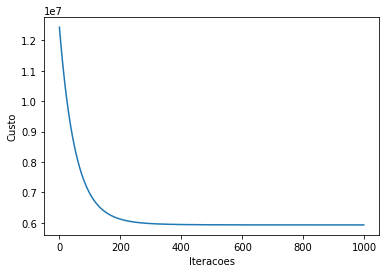

In [54]:
plt.ylabel('Custo')
plt.xlabel('Iteracoes')
plt.plot(range(cost_mbgd.shape[0]), cost_mbgd)
print(l2_cost(X, X_mbgd, ,))

## Validation
Now, we had already trained our model on training set. We will use the parameters obtained to estimate the model's error on the validation set.

In [25]:
validation_size = y_validation.shape[1]
print("validation size = ", validation_size)
gd_y_hat = np.dot(w_gd.T, x_validation) + b_gd
gd_cost = l2_cost(x_test, gd_y_hat, y_validation, validation_size)
print("The cost on validation set GD: ", gd_cost)

sgd_y_hat = np.dot(w_sgd.T, x_validation) + b_sgd
sgd_cost = l2_cost(x_test, sgd_y_hat, y_validation, validation_size)
print("The cost on validation set SGD: ", sgd_cost)


validation size =  10000
The cost on validation set GD:  141738885.26153907
The cost on validation set SGD:  7624213.541833456


## Prediction

In [26]:
index = np.random.randint(validation_size)
x_index = x_validation[:, index]
y_index = y_validation[:, index]
gd_y_predict = np.dot(w_gd.T, x_index) + b_gd
sgd_y_predict = np.dot(w_sgd.T, x_index) + b_sgd
print('index = ', index)
print('the input: ', x_index)
print('gd_prediction: ', gd_y_predict)
print('sgd_prediction: ', sgd_y_predict)
print('true label: ', y_index)


index =  8985
the input:  [ 0.41  3.    1.    4.   62.2  57.    4.78  4.74  2.96]
gd_prediction:  [[28.52114227 28.52114227 28.52114227 28.52114227 28.52114227 28.52114227
  28.52114227 28.52114227 28.52114227]
 [28.52114227 28.52114227 28.52114227 28.52114227 28.52114227 28.52114227
  28.52114227 28.52114227 28.52114227]
 [28.52114227 28.52114227 28.52114227 28.52114227 28.52114227 28.52114227
  28.52114227 28.52114227 28.52114227]
 [28.52114227 28.52114227 28.52114227 28.52114227 28.52114227 28.52114227
  28.52114227 28.52114227 28.52114227]
 [28.52114227 28.52114227 28.52114227 28.52114227 28.52114227 28.52114227
  28.52114227 28.52114227 28.52114227]
 [28.52114227 28.52114227 28.52114227 28.52114227 28.52114227 28.52114227
  28.52114227 28.52114227 28.52114227]
 [28.52114227 28.52114227 28.52114227 28.52114227 28.52114227 28.52114227
  28.52114227 28.52114227 28.52114227]
 [28.52114227 28.52114227 28.52114227 28.52114227 28.52114227 28.52114227
  28.52114227 28.52114227 28.52114227

Rascunho
===

In [ ]:
print(theta_mbgd)

In [ ]:
print(cost_mbgd)

In [28]:
a = np.array([1,2])
b = np.random.rand((2))
print(l2_cost(np.array([1,2]), a,  b, 2 ))

0.9688274165494749


In [29]:
np.random.rand((2))

array([0.09702097, 0.36017501])

In [30]:
print(float((1/(2*2)))*np.sum(a-b)**2)

0.0


In [31]:
print((1.0/(2*2)))

0.25
